# Credit EDA Case Study

- ## Introduction

  In this notebook, we have mainly focused on analysing the data of current and previous bank loan applicant.
  The datasets contains their information about their current and previous loan details.

- ## Approach

  For the Exploratory data analysis, mentioned steps have been followed.
  
  - Import Modules
  - Read dataset
  - Data cleaning
  - Univariate Analysis
  - Bivariate and Multivariate Analysis

In [1]:
#Importing necessary libraries
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
#Reading application dataset
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Checking the shape of the dataset
df.shape

(307511, 122)

In [4]:
#Describing the dataset to understand the tendencies of the dataset as well distribution.

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Now we'll be visualising the null distribution in the dataset.
We will be dropping the columns with more than 40% null values.

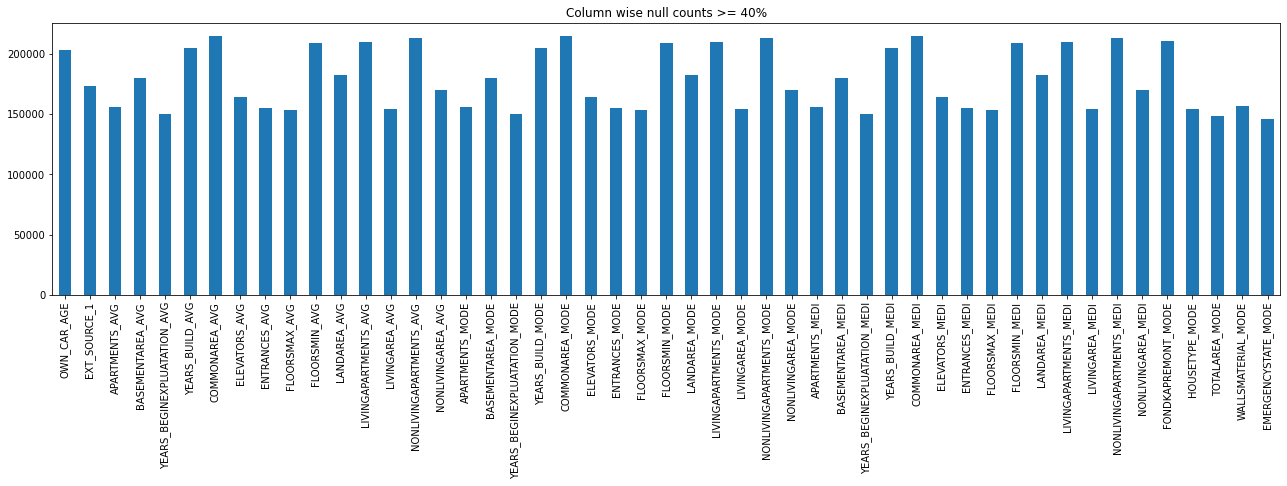

In [5]:
null_cols = df.isnull().sum()
null_cols = null_cols[null_cols.values> (0.4*df.shape[0])]

plt.figure(figsize=(22,5))
plt.title('Column wise null counts >= 40%')
null_cols.plot(kind = 'bar')
plt.show()

In [6]:
#Dropping the null columns.

df.drop(null_cols.index, axis = 1, inplace = True)

In [7]:
#Checking shape of dataset after dropping of huge null data.

df.shape

(307511, 73)

Let's once more check the remaining null values in the columns, in order to impute them as required.

In [8]:
# Extracting null percentage column wise and sorting them to display.

nulls = (df.isnull().sum()/df.shape[0])*100
nulls.sort_values(ascending = False).head(27)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


We have to replace null values in 'Occupation Type' column with 'unknown' as it is not feasable to impute them with mode or median. This will create a new category 'unknown' in the column.

In [9]:
df.OCCUPATION_TYPE = df.OCCUPATION_TYPE.replace(np.nan, 'unknown')

A huge chunk of columns/features are there that might not be of any use, or may not reveal anything about the client.
So they are to be removed from the dataset prior to do further analysis.

In [10]:
#Listing the unwanted columns from the dataset.

unwanted=['EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

# Dropping the columns in 'unwanted' variable from the dataset.

df.drop(labels=unwanted,axis=1,inplace=True)

We are still left with so many columns having null values, that we need to take care of.
So we have to check again with columns and their null counts.

In [11]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

The mode value of 'OBS_' and 'DEF_' columns and 'AMT_REQ_' columns are all 0.0 thus imputing the null values with mode is better than imputing with median or mean, since this distribution is very uneven.

In [12]:
print(df.OBS_30_CNT_SOCIAL_CIRCLE.mode())
print(df.DEF_30_CNT_SOCIAL_CIRCLE.mode())
print(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


Imputing null values of all below columns with mode of each column.

In [13]:
df.OBS_30_CNT_SOCIAL_CIRCLE = df.OBS_30_CNT_SOCIAL_CIRCLE.replace(np.nan, 0.0)
df.DEF_30_CNT_SOCIAL_CIRCLE = df.DEF_30_CNT_SOCIAL_CIRCLE.replace(np.nan,0.0)
df.OBS_60_CNT_SOCIAL_CIRCLE = df.OBS_60_CNT_SOCIAL_CIRCLE.replace(np.nan,0.0)
df.DEF_60_CNT_SOCIAL_CIRCLE = df.DEF_60_CNT_SOCIAL_CIRCLE.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_HOUR = df.AMT_REQ_CREDIT_BUREAU_HOUR.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_DAY = df.AMT_REQ_CREDIT_BUREAU_DAY.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_WEEK = df.AMT_REQ_CREDIT_BUREAU_WEEK.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_MON = df.AMT_REQ_CREDIT_BUREAU_MON.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_QRT = df.AMT_REQ_CREDIT_BUREAU_QRT.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.replace(np.nan,0.0)

In [14]:
#Checking values counts of Goods Price column
df.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [15]:
#Finding the median value of the AMT_GOOD_PRICE column

df.AMT_GOODS_PRICE.median()

450000.0

For AMT_GOODS_PRICE imputing null values with median as mean and mode would not be feasible choice.

In [16]:
# Imputing AMT_GOODS_PRICE null values.

df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(), inplace = True)

In [17]:
# Checking value counts for the AMT_ANNUITY column

df.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [18]:
# Finding median value of AMT_ANNUITY column

df.AMT_ANNUITY.median()

24903.0

Imputing null values of AMT_ANNUITY with median value of the column.

In [19]:
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(), inplace = True)

Imputing null values of NAME_TYPE_SUITE column with a new 'unknown' category.

In [20]:
df.NAME_TYPE_SUITE = df.NAME_TYPE_SUITE.replace(np.nan, 'unknown')

In [21]:
#Checking once again the number of null values in the dataset.

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

Column CODE_GENDER have 'XNA' categorical value, which means 'not available'.

In [22]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since the count of 'XNA' value is too less, it is safe to replace it with the mode value of the column.

In [23]:
#Replacing XNA with mode of CODE_GENDER F
df.CODE_GENDER = df.CODE_GENDER.replace('XNA','F')
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Column ORGANIZATION_TYPE also have 'XNA' values in it. Let's see.

In [24]:
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Value count of 'XNA' for ORGANIZATION_TYPE column is very large, therefore imputing it with mode of the column would be a feasible.

In [25]:
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.replace('XNA', np.nan)

In [26]:
df.AMT_INCOME_TOTAL.value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

For 'AMT_CREDIT' and 'AMT_INCOME_TOTAL' columns which have values continous in nature, we will create bins with a large range upto 10000000000.

In [27]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE'] = pd.cut(df.AMT_INCOME_TOTAL, bins, labels = slots)

In [28]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE'] = pd.cut(df.AMT_CREDIT, bins = bins, labels = slots)

Distributing the datasets w.r.t target variables 0 and 1.

In [29]:
target0 = df.loc[df["TARGET"] == 0]
target1 = df.loc[df["TARGET"] == 1]

#Calculating the imbalance ratio of the two target variables.

round(len(target0) / len(target1), 2)

11.39

The imbalance ratio came out to be 11.39.

## Univariate Analysis for target0 (No difficulties)

Ploting a countplot of Income range of clients w.r.t Gender distribution.

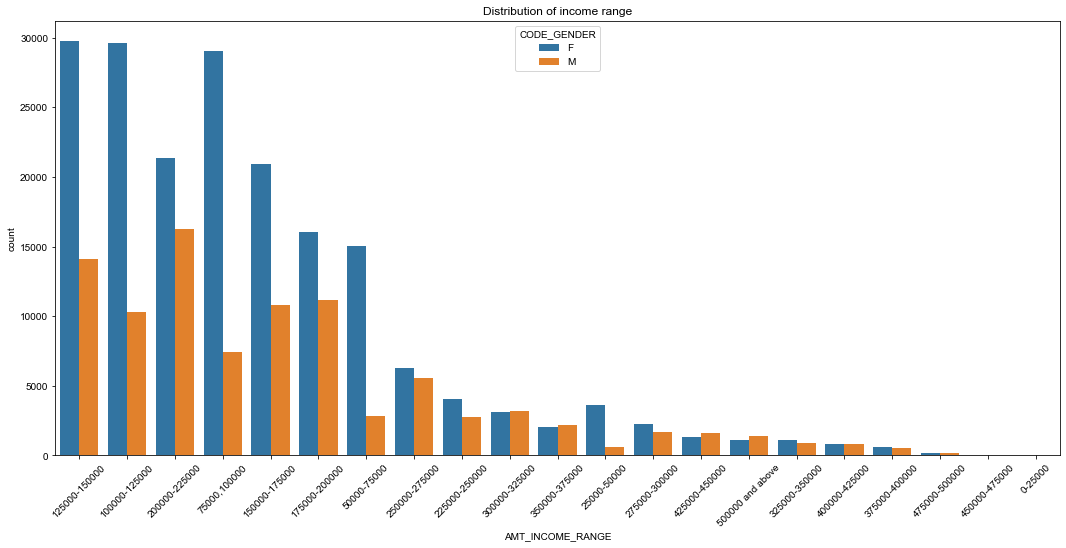

In [30]:
plt.figure(figsize = (18,8))
sns.countplot(data = target0, x = 'AMT_INCOME_RANGE', order = target0.AMT_INCOME_RANGE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income range')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.Income range from 100000 to 200000 is having more number of credits.</ol>
<ol>2.Graph depicts that females are more than male in having credits for the range.</ol>
<ol>3.Very less count for the income range of 400000 and above.</ol>

Countplot of Income type with Gender distribution.

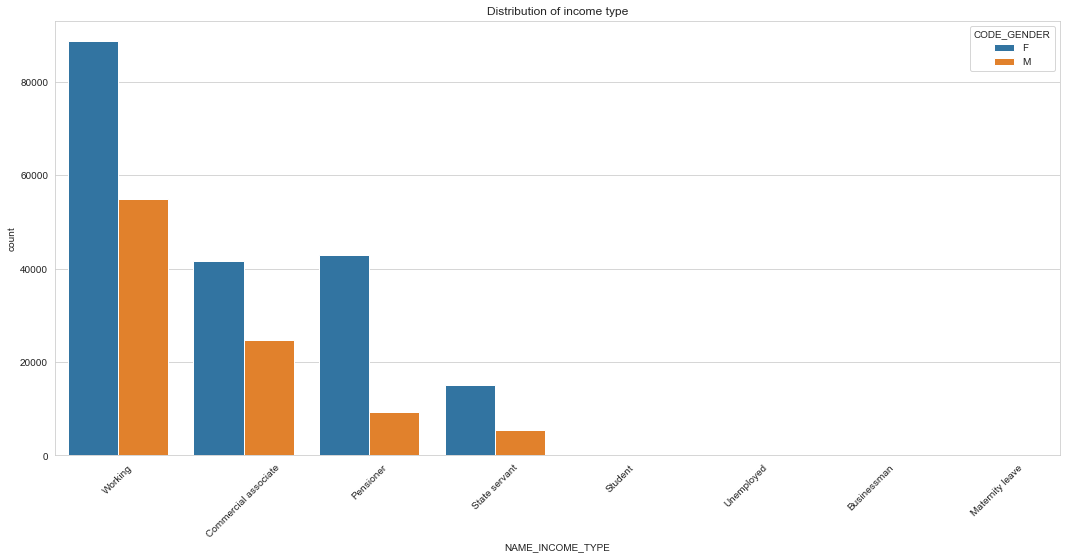

In [31]:
plt.figure(figsize = (18,8))
sns.countplot(data = target0, x = 'NAME_INCOME_TYPE', order = target0.NAME_INCOME_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

In [32]:
#Checking the value counts for Income type columns to verify the above countplot.
df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<ol>1.For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.</ol>
<ol>2.For this Females are having more number of credits than male.</ol>
<ol>3.Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.</ol>

Countplot for the Contract Type column.

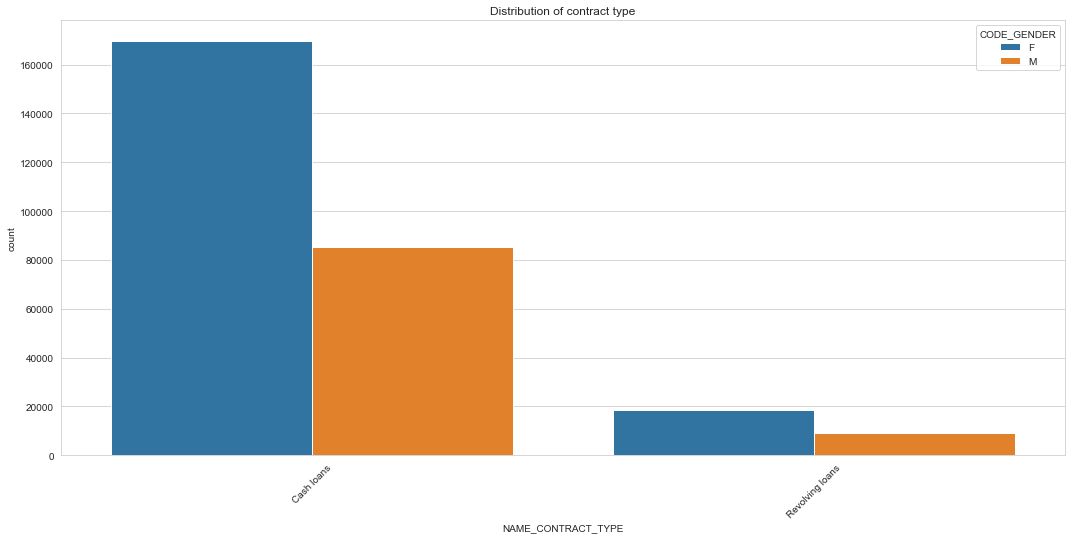

In [33]:
plt.figure(figsize = (18,8))
sns.countplot(data = target0, x = 'NAME_CONTRACT_TYPE', order = target0.NAME_CONTRACT_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of contract type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’.</ol>
<ol>2.For this also Female is leading for applying credits.</ol>

Distribution of Organization Type.

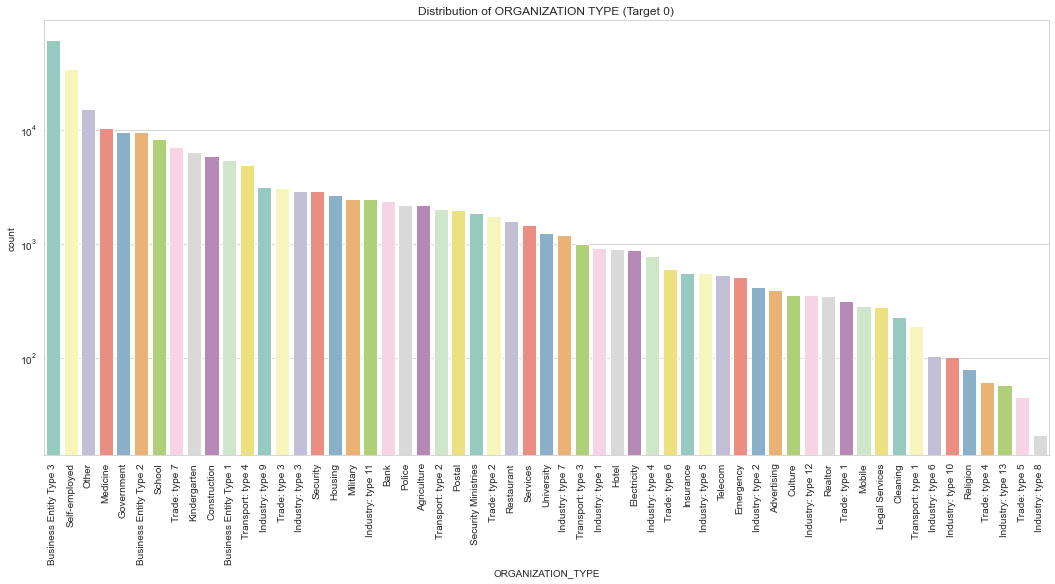

In [34]:
plt.figure(figsize = (18,8))
plt.yscale('log')
sns.countplot(data = target0, x = 'ORGANIZATION_TYPE', order = target0.ORGANIZATION_TYPE.value_counts().index, palette="Set3")
plt.title('Distribution of ORGANIZATION TYPE (Target 0)')
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
plt.show()

<ol>1.Clients who have applied for credits are mostly from organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.</ol>
<ol>2.Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.</ol>

## Univariate Analysis for target1 (With difficulties)

Income range with Gender distribution.

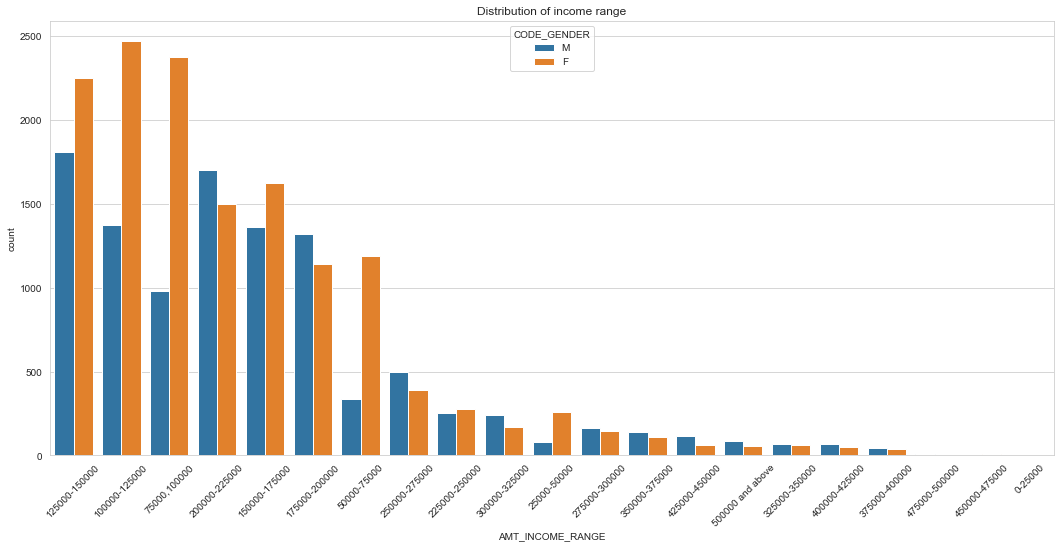

In [35]:
plt.figure(figsize = (18,8))
sns.countplot(data = target1, x = 'AMT_INCOME_RANGE', order = target1.AMT_INCOME_RANGE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income range')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.In some ranges male counts are higher than females.</ol>
<ol>2.Income range from 100000 to 200000 is having more number of credits.</ol>
<ol>3.Very less count for income range of 400000 and above.</ol>

Income Type by Gender distribution.

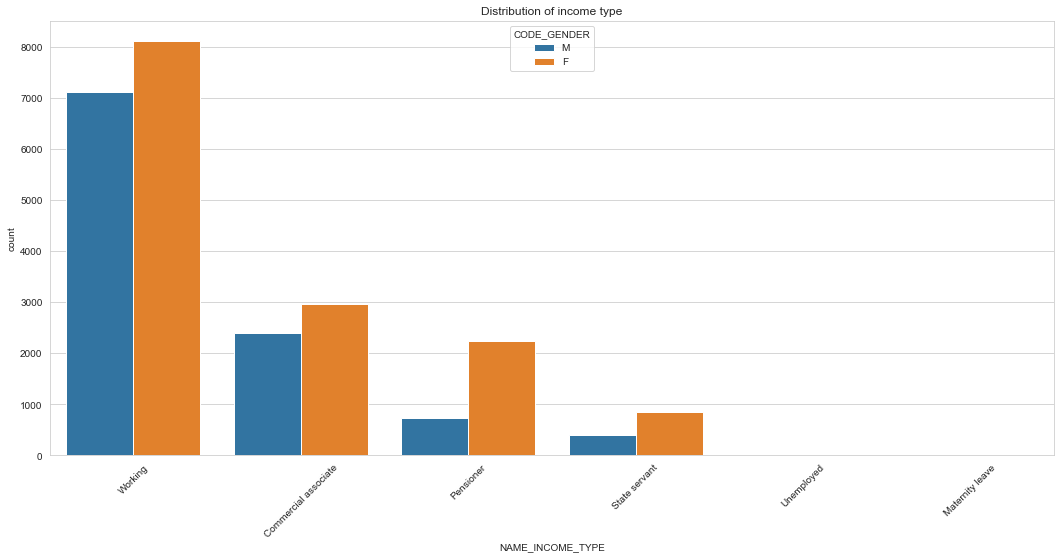

In [36]:
plt.figure(figsize = (18,8))
sns.countplot(data = target1, x = 'NAME_INCOME_TYPE', order = target1.NAME_INCOME_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.For income type ‘working’, ’commercial associate’, and ‘Pensioner’ the number of credits are higher than others.</ol>
<ol>2.Here also Females are having more number of credits than male.</ol>
<ol>3.Less number of credits for income type ‘Maternity leave’ and 'Unemployed'.</ol>

Countplot for Contract Type w.r.t Gender.

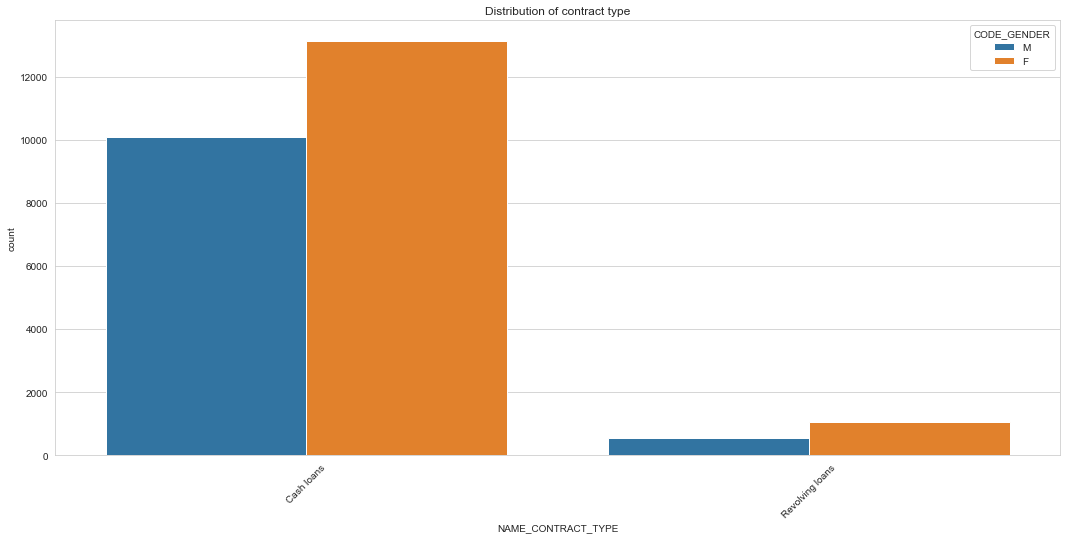

In [37]:
plt.figure(figsize = (18,8))
sns.countplot(data = target1, x = 'NAME_CONTRACT_TYPE', order = target1.NAME_CONTRACT_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of contract type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.Contract type ‘cash loans’ is have higher number of credits than ‘Revolving loans’.</ol>
<ol>2.Here also Female is leading for applying credits.</ol>

Organization Type distribution.

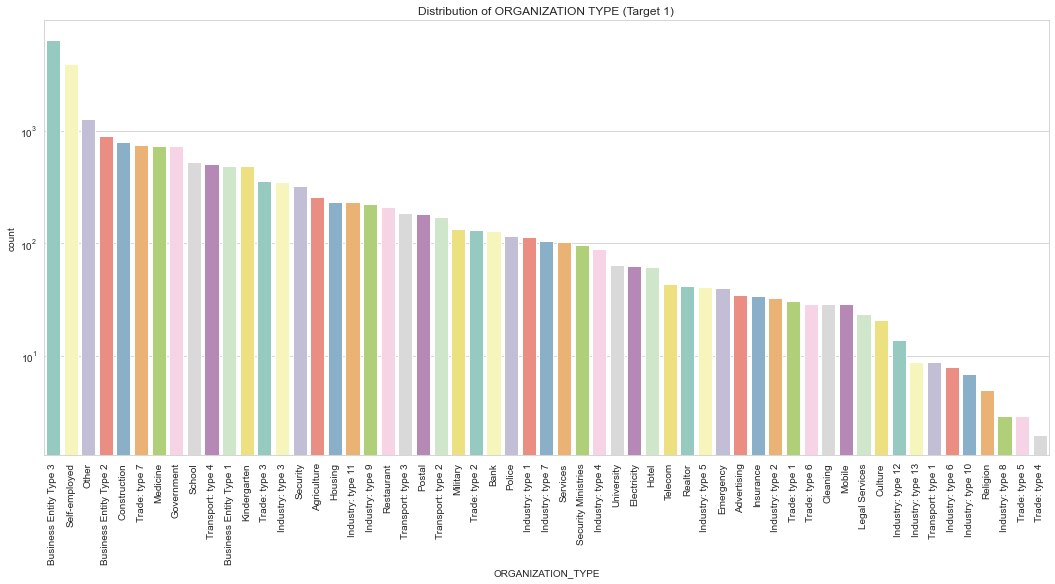

In [38]:
plt.figure(figsize = (18,8))
plt.yscale('log')
sns.countplot(data = target1, x = 'ORGANIZATION_TYPE', order = target1.ORGANIZATION_TYPE.value_counts().index, palette="Set3")
plt.title('Distribution of ORGANIZATION TYPE (Target 1)')
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
plt.show()

<ol>1.Clients which have applied for credits are mostly from the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , 'Business Entity Type 2', 'Construction'.</ol>
<ol>2.Less clients are from Trade type 4, type5, Industry type 8,type 10, type 6 and Religion.</ol>
<ol>3.Similar to distribution of target0.</ol>

### Detecting Outliers in the numeric columns for target0 (No Difficulties)

Boxplot for Total Income Amount

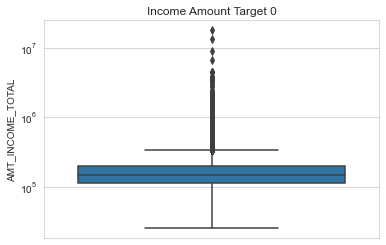

In [39]:
sns.set_style('whitegrid')
plt.title('Income Amount Target 0')
plt.yscale('log')
sns.boxplot(data = target0, y = 'AMT_INCOME_TOTAL')
plt.show()

<ol>1.Some outliers are noticed in total income amount.</ol>
<ol>2.The third quartiles is very slim for income amount.</ol>

Boxplot for Credit Amount

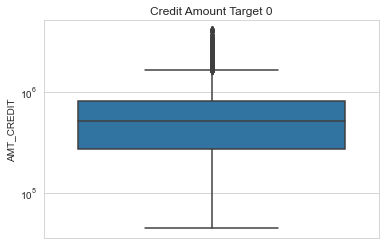

In [40]:
sns.set_style('whitegrid')
plt.title('Credit Amount Target 0')
plt.yscale('log')
sns.boxplot(data = target0, y = 'AMT_CREDIT')
plt.show()

<ol>1.Some outliers are noticed in credit amount.</ol>
<ol>2.The first quartile is bigger than third quartile which means most of the credits of clients are present in the first quartile.</ol>

Boxplot for Loan Annunity

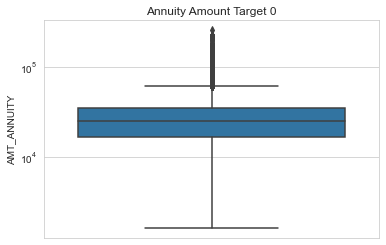

In [41]:
sns.set_style('whitegrid')
plt.title('Annuity Amount Target 0')
plt.yscale('log')
sns.boxplot(data = target0, y = 'AMT_ANNUITY')
plt.show()

<ol>1.Some outliers are noticed in annuity amount.</ol>
<ol>2.The first quartile is bigger than third quartile which means most of the annuity clients are from first quartile.</ol>

### Detecting Outliers in the numeric columns for target1 (With Difficulties)

Boxplot for Total Income Amount

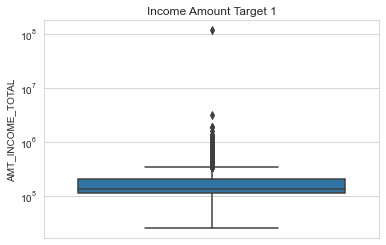

In [42]:
sns.set_style('whitegrid')
plt.title('Income Amount Target 1')
plt.yscale('log')
sns.boxplot(data = target1, y = 'AMT_INCOME_TOTAL')
plt.show()

<ol>1.Some outliers are noticed in income amount.</ol>
<ol>2.The third quartiles is very slim for income amount.</ol>
<ol>3.Most of the clients of income are present in first quartile.</ol>

Boxplot for Credit Amount

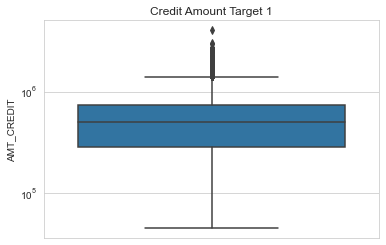

In [43]:
sns.set_style('whitegrid')
plt.title('Credit Amount Target 1')
plt.yscale('log')
sns.boxplot(data = target1, y = 'AMT_CREDIT')
plt.show()

<ol>1.Some outliers are noticed in credit amount.</ol>
<ol>2.The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.</ol>

Boxplot for Loan ANNUITY

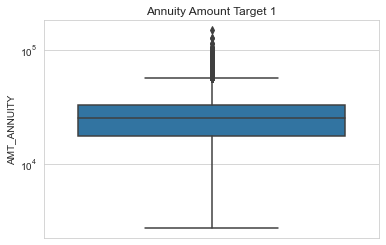

In [44]:
sns.set_style('whitegrid')
plt.title('Annuity Amount Target 1')
plt.yscale('log')
sns.boxplot(data = target1, y = 'AMT_ANNUITY')
plt.show()

<ol>1.Some outliers are noticed in annuity amount.</ol>
<ol>2.The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.</ol>

## Deriving correlation of columns for both target0 and target1.

In [45]:
# Deriving correlation for target 0
target0_corr = target0.iloc[:,2:31].corr(method='spearman')
# target0_corr

# Deriving correlation for target 1
target1_corr = target1.iloc[:,2:31].corr(method='spearman')
# target1_corr

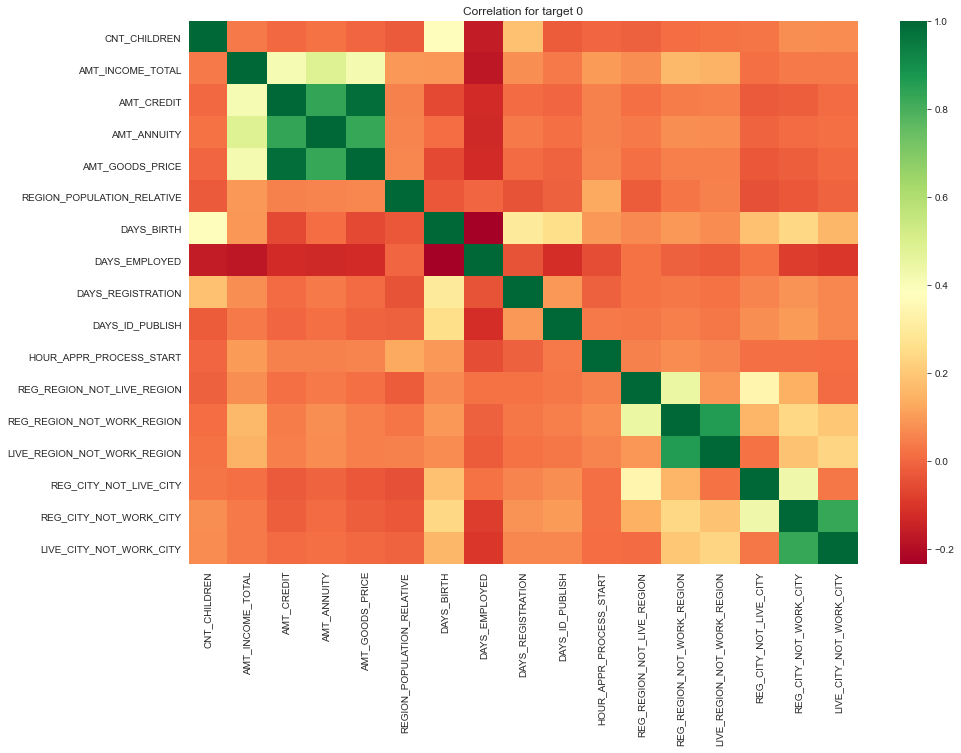

In [46]:
# Heatmap for correlation of target 0

plt.figure(figsize=(15, 10))
plt.title('Correlation for target 0')
sns.heatmap(target0_corr, cmap = "RdYlGn", annot = False)
plt.show()

<ol>1.Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.</ol>
<ol>2.Less children client have in densely populated area.</ol>
<ol>3.Credit amount is higher to densely populated area.</ol>
<ol>4.The income is also higher in densely populated area.</ol>

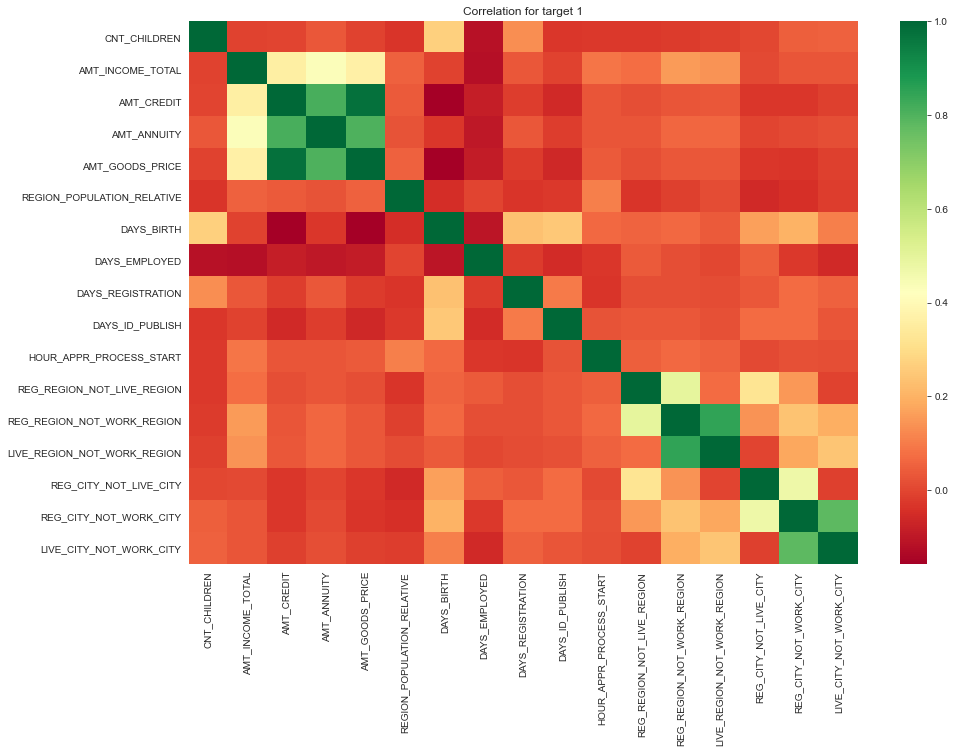

In [47]:
# Heatmap for correlation of target 0

plt.figure(figsize=(15, 10))
plt.title('Correlation for target 1')
sns.heatmap(target1_corr, cmap = "RdYlGn", annot = False)
plt.show()

#### Bivariate Analysis of numeric variables for target0 (No Difficulties).

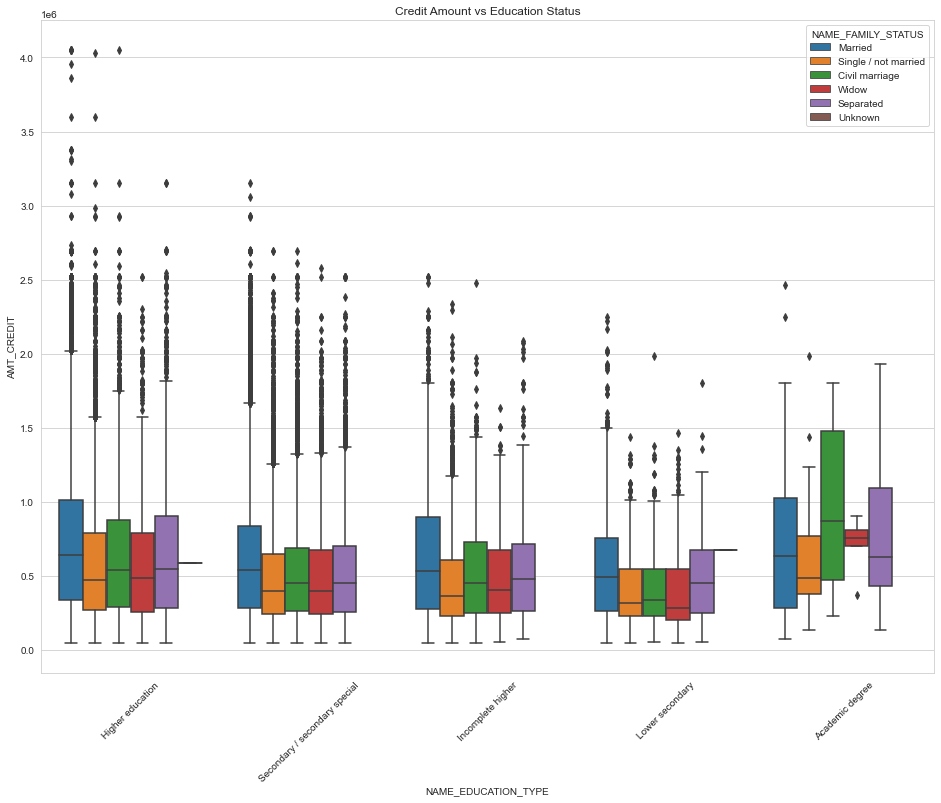

In [48]:
#Boxplot for Credit Amount in target 0

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

<ol>1.In Higher education - 'marriage', 'single' and 'civil marriage' are having more outliers.</ol>
<ol>2.In Academic degree - 'civil marriage', 'marriage' and 'separated' are having higher number of credits than others.</ol>
<ol>3.Civil marriage in Academic degree have most of the credits in the third quartile.</ol>

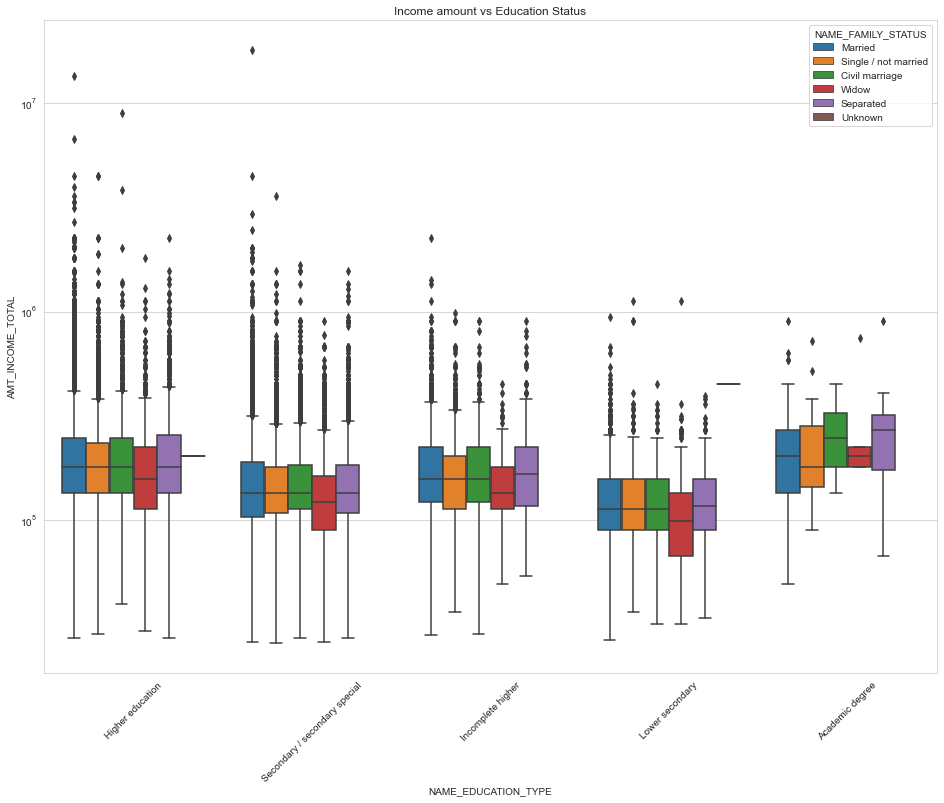

In [49]:
# Boxplot for Income amount in target 0

plt.figure(figsize = (16, 12))
plt.xticks(rotation = 45)
plt.yscale('log')
sns.boxplot(data = target0, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Income amount vs Education Status')
plt.show()

<ol>1.In Higher education the Income amount is mostly equal with each family status.</ol>
<ol>2.Income amount for Academic degree holders is higher than Higher education holders.</ol>
<ol>3.Less outliers in Academic degree and most outliers in Higher education and Secondary education.</ol>
<ol>4.Lowest Income amount for Lower secondary holders.</ol>

### Bivariate Analysis of numeric variables for target1 (With Difficulties).

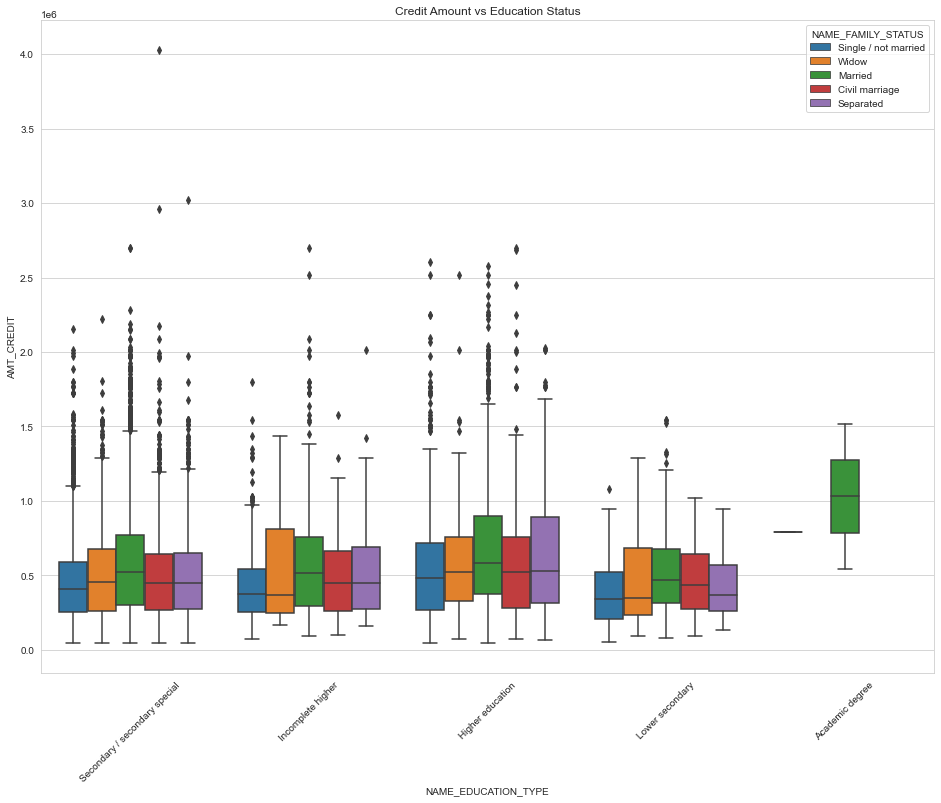

In [50]:
#Boxplot for Credit Amount in target 1

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

<ol>1.Academic degree holders seems to have higher credit amount, though other family status is not available.</ol>
<ol>2.More outliers can be seen in Secondary education holders.</ol>
<ol>3.'Separated' and 'Married' clients have more credit amount in third quartile.</ol>
<ol>4.Lower sceondary holders have less credit amount comparing to others.</ol>

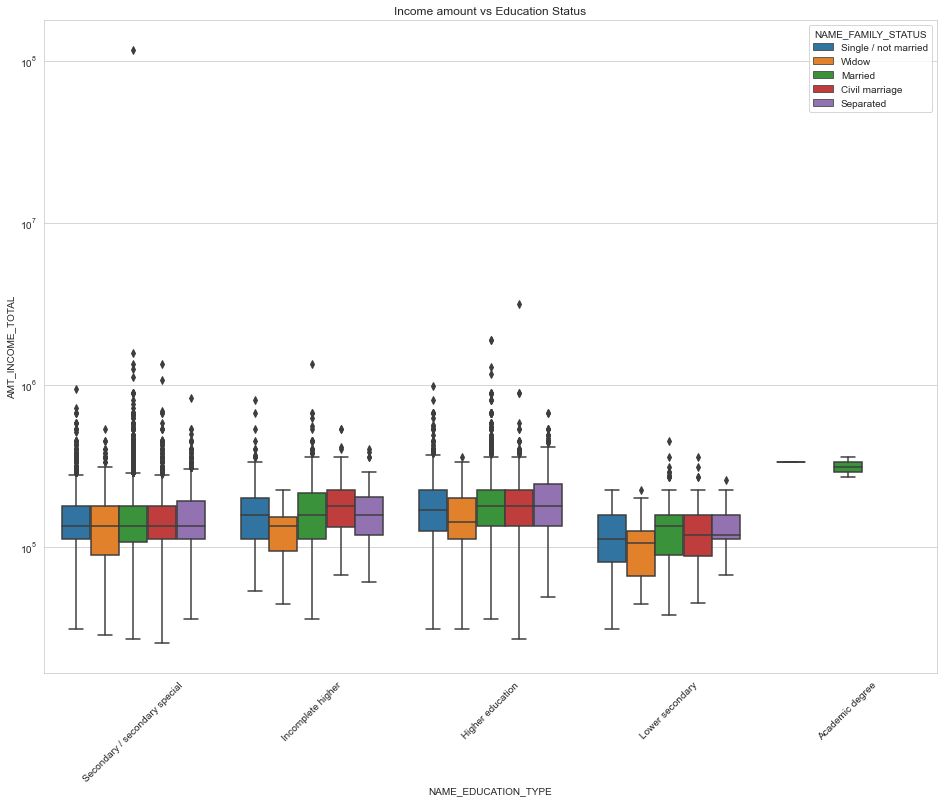

In [51]:
# Boxplot for Income amount in target 1

plt.figure(figsize = (16, 12))
plt.xticks(rotation = 45)
plt.yscale('log')
sns.boxplot(data = target1, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Income amount vs Education Status')
plt.show()

Secondary special holders have almost same Income amount for all family status.